In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [18]:
widgetDataToPlot = widgets.Dropdown(
    options=['Temperature', 'Dew Point', 'Humidity','Wind', 'Wind Speed' ,'Wind Gust','Pressure','Precip','Condition'],
    value='Temperature',
    description='Data To Plot:',
    disabled=False,
)

start_date = widgets.Text(
    value='2020-01-01 00:00:00',
    placeholder='Type something',
    description='Start_Date:',
    disabled=False
)
end_date = widgets.Text(
    value='2020-01-01 23:00:00',
    placeholder='Type something',
    description='End_Date:',
    disabled=False
)

display(start_date,end_date, widgetDataToPlot)

Text(value='2020-01-01 00:00:00', description='Start_Date:', placeholder='Type something')

Text(value='2020-01-01 23:00:00', description='End_Date:', placeholder='Type something')

Dropdown(description='Data To Plot:', options=('Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed', '…

In [21]:
start = start_date.value
end = end_date.value
dataToPlot = widgetDataToPlot.value

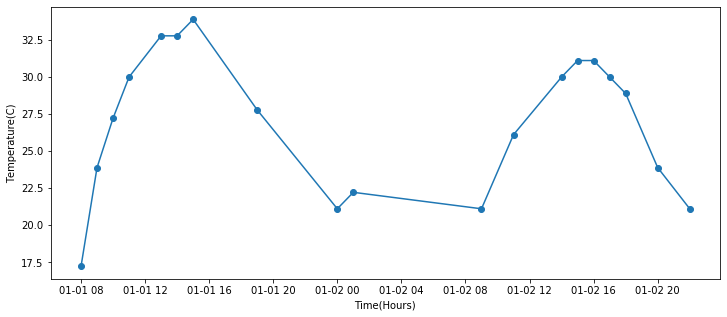

In [22]:
df = pd.read_excel('Keffi_Weather_Combined.xlsx')
p = pd.date_range(start='1/1/2014',periods=len(df),freq='1H' )
df.set_index(p,inplace=True)

rng = df[start:end]

temperature = rng.Temperature
dewPoint = rng.Dew_Point
humidity = rng.Humidity
wind = rng.Wind
windSpeed = rng.Wind_Speed
windGust = rng.Wind_Gust
pressure = rng.Pressure
precip = rng.Precip
condition = rng.Condition

df['Temperature'] = temperature
df['Dew_Point'] = dewPoint
df['Humidity'] = humidity
df['Wind'] = wind
df['Wind_Speed'] = windSpeed
df['Wind_Gust'] = windGust
df['Pressure'] = pressure
df['Precip'] = precip
df['Condition'] = condition 

temp1 = temperature.dropna(how='any').astype('str')
dewP1 = dewPoint.dropna(how='any').astype('str')
humidity1 = humidity.dropna(how='any').astype('str')
wind1 = wind.dropna(how='any').astype('str')
windSpeed1 = windSpeed.dropna(how='any').astype('str')
windGust1 = windGust.dropna(how='any').astype('str')
pressure1 = pressure.dropna(how='any').astype('str')
precip1 = precip.dropna(how='any').astype('str')
condition1 = condition.dropna(how='any').astype('str')

temp2 = temp1.str.extract(r'([0-9]+)')
dewP2 = dewP1.str.extract(r'([0-9]+)')
humidity2 = humidity1.str.extract(r'([0-9]+)')
wind2 = wind1
windSpeed2 = windSpeed1.str.extract(r'([0-9]+)')
windGust2 = windGust1.str.extract(r'([0-9]+)')
pressure2 = pressure1.str.extract(r'([\d\.\d]+)')
precip2 = precip1.str.extract(r'([\d\.\d]+)')
condition2 = condition1

df['Temperature'] = temp2
df['Dew_Point'] = dewP2
df['Humidity'] = humidity2
df['Wind'] = wind2
df['Wind_Speed'] = windSpeed2
df['Wind_Gust'] = windGust2
df['Pressure'] = pressure2
df['Precip'] = precip2
df['Condition'] = condition2

temp3 = df['Temperature'].dropna(how='any').astype('str')
dewP3 = df['Dew_Point'].dropna(how='any').astype('str')
humidity3 = df['Humidity'].dropna(how='any').astype('str')
wind3 = df['Wind'].dropna(how='any').astype('str')
windSpeed3 = df['Wind_Speed'].dropna(how='any').astype('str')
windGust3 = df['Wind_Gust'].dropna(how='any').astype('str')
pressure3 = df['Pressure'].dropna(how='any').astype('str')
precip3 = df['Precip'].dropna(how='any').astype('str')
condition3 = df['Condition'].dropna(how='any').astype('str')

# Temperature and Dew Point in Celsius
temp = (temp3.astype('float') -32) * (5/9)
dewP = (dewP3.astype('float') - 32) * (5/9)

hum = humidity3.astype('int')
w = wind3

#Wind Speed and Wind Gust in kmh
wS = windSpeed3.astype('float') * 1.60934
wG = windGust3.astype('float') * 1.60934
press = pressure3.astype('float')
preC = precip3.astype('float')
c = condition3

if(dataToPlot == 'Temperature'):
    plt.plot(temp,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Temperature(C)")
elif(dataToPlot == 'Dew Point'):
    plt.plot(dewP,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Dew Point(C)")
elif(dataToPlot == 'Humidity'):
    plt.plot(hum,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Humidity(%)")
elif(dataToPlot == 'Wind'):
    plt.plot(w,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind")
elif(dataToPlot == 'Wind Speed'):
    plt.plot(wS,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind Speed(kmh)")
elif(dataToPlot == 'Wind Gust'):
    plt.plot(wG,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Wind Gust(kmh)")
elif(dataToPlot == 'Pressure'):
    plt.plot(press,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Pressure(in)")
elif(dataToPlot == 'Precip'):
    plt.plot(preC,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Precip(in)")
elif(dataToPlot == 'Condition'):
    plt.plot(c,"-o")
    plt.xlabel("Time(Hours)")
    plt.ylabel("Condition")
else:
    print("Enter a correct data to plot")